## importing libraries

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('profiles.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
age            59946 non-null int64
body_type      54650 non-null object
diet           35551 non-null object
drinks         56961 non-null object
drugs          45866 non-null object
education      53318 non-null object
essay0         54458 non-null object
essay1         52374 non-null object
essay2         50308 non-null object
essay3         48470 non-null object
essay4         49409 non-null object
essay5         49096 non-null object
essay6         46175 non-null object
essay7         47495 non-null object
essay8         40721 non-null object
essay9         47343 non-null object
ethnicity      54266 non-null object
height         59943 non-null float64
income         59946 non-null int64
job            51748 non-null object
last_online    59946 non-null object
location       59946 non-null object
offspring      24385 non-null object
orientation    59946 non-null object
pets

In [3]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


### Cleaning Data

In [4]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [5]:
df.sign.value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

In [6]:
df['sign_clean'] = df.sign.str.split().str.get(0)

In [7]:
df.religion.value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

In [8]:
df['religion_cleaned'] = df.religion.str.split().str.get(0)

In [9]:
df.religion_cleaned.value_counts()

agnosticism     8812
other           7743
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: religion_cleaned, dtype: int64

In [10]:
df.sign_clean.value_counts()

leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: sign_clean, dtype: int64

### Distribution of age 

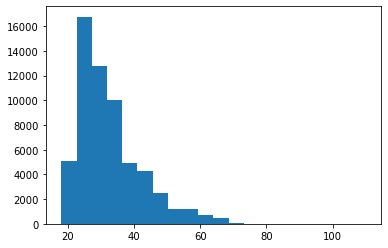

In [11]:
plt.hist(data=df, x='age', bins=20)
plt.show()

#### from the graph which shows that, the engagement of most users were of the age of the late 20s and early 30s

In [12]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

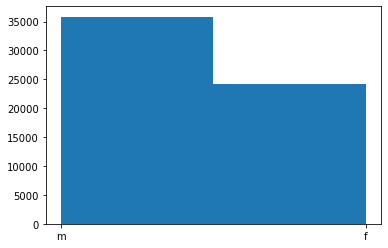

In [13]:
plt.hist(data=df, x ='sex', bins=2)
plt.show()

#### Majority of the users were males compared to the females.

In [14]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


#### The average income of the users was 20,033 with mininum of -1 and maximim of 1000000

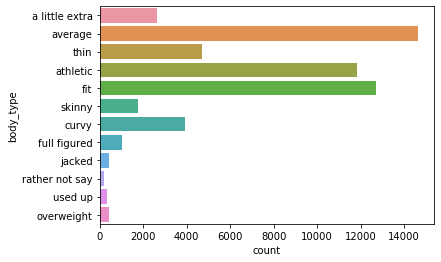

In [15]:
sns.countplot(data=df, y="body_type");

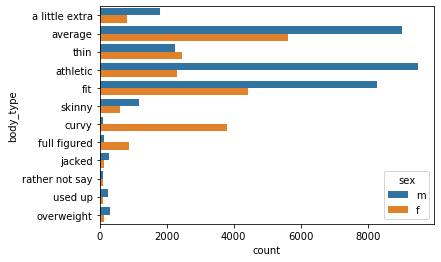

In [16]:
sns.countplot(data=df, y="body_type", hue = "sex");

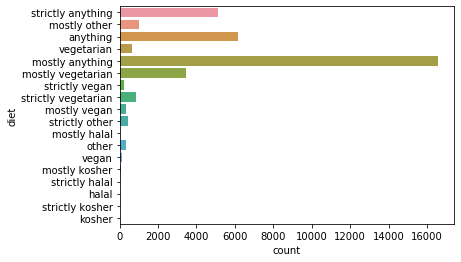

In [17]:
sns.countplot(data=df, y="diet");

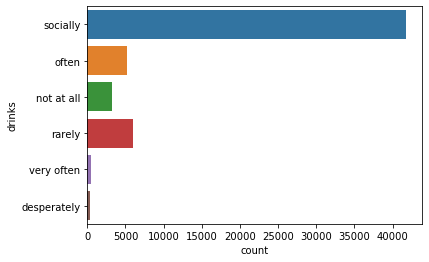

In [18]:
sns.countplot(data=df, y="drinks");

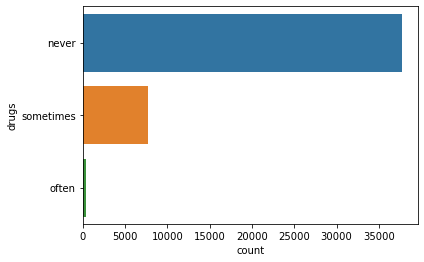

In [19]:
sns.countplot(data=df, y="drugs");

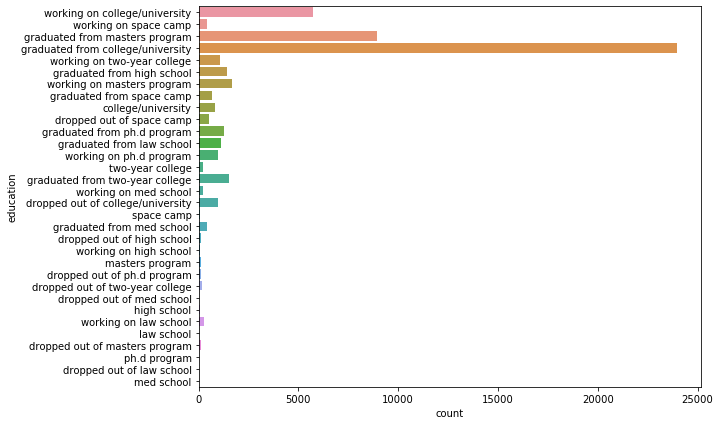

In [20]:
plt.figure(figsize=(9,7))
sns.countplot(data=df, y="education");

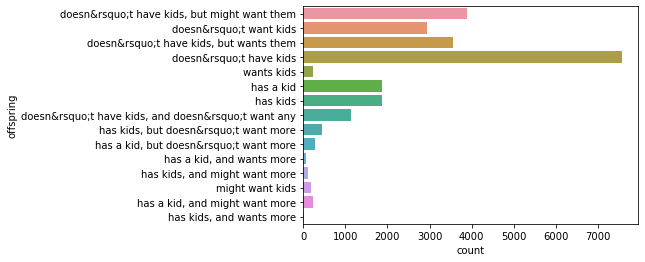

In [21]:
sns.countplot(data=df, y="offspring");

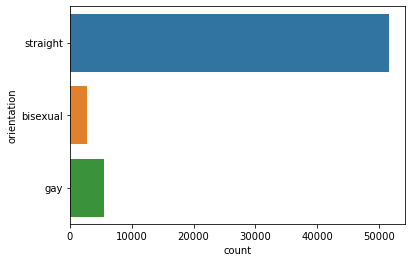

In [22]:
sns.countplot(data=df, y="orientation");

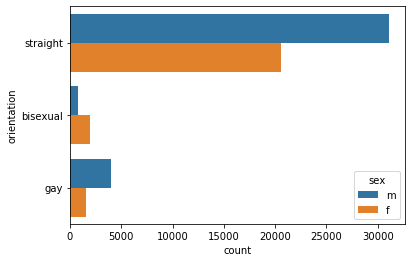

In [23]:
sns.countplot(data=df, y="orientation", hue = "sex");

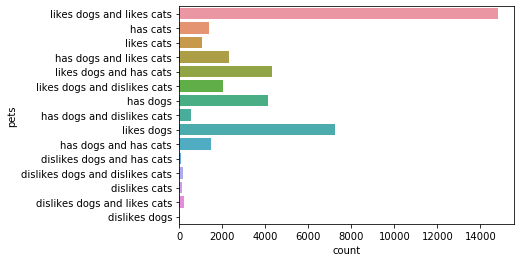

In [24]:
sns.countplot(data=df, y="pets");

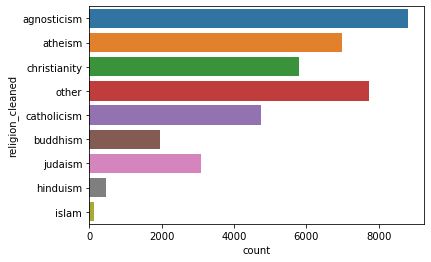

In [25]:
sns.countplot(data=df, y="religion_cleaned");

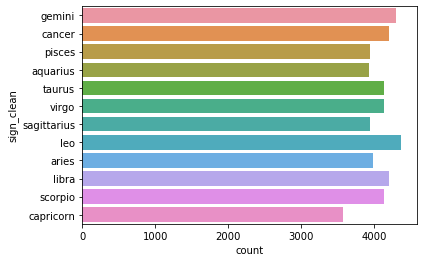

In [26]:

sns.countplot(data=df, y="sign_clean");

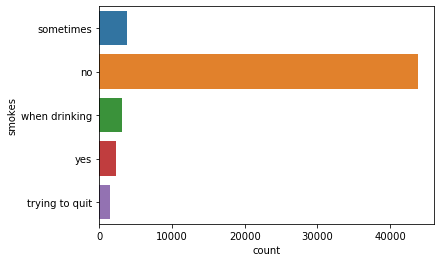

In [27]:
sns.countplot(data=df, y="smokes");

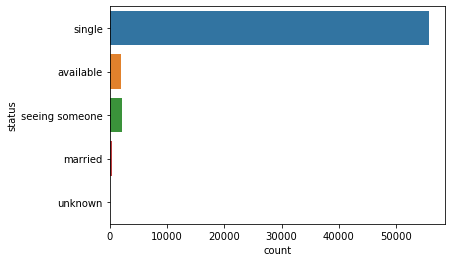

In [28]:
sns.countplot(data=df, y="status");

### Data Preprocessing

In [29]:
df.isna().sum()

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
sign_clean          11056
religion_cleaned    20226
dtype: int64

In [30]:
col = ['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned',
       'sex', 'job', 'sign_clean']
df = df[col].dropna()

In [31]:
df.shape

(16453, 8)

In [32]:
df.columns

Index(['body_type', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex',
       'job', 'sign_clean'],
      dtype='object')

In [33]:
for i in col[:-1]:
    df = pd.get_dummies(df, columns=[i], prefix = [i])

In [34]:
df.head()

,sign_clean,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df.sign_clean.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: sign_clean, dtype: int64

In [36]:
X = df.iloc[:, 1:len(df.columns)]
Y = df.iloc[:, 0:1]

x_train, x_test, y_train, y_test =  train_test_split(X, Y, test_size = 0.25, random_state = 0)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

### Building Model:

In [37]:
knn = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
knn_pred = knn.predict(x_train)
print(classification_report(y_train, knn_pred))

              precision    recall  f1-score   support

    aquarius       0.25      0.65      0.36       968
       aries       0.25      0.51      0.34       983
      cancer       0.29      0.43      0.35      1129
   capricorn       0.33      0.34      0.33       882
      gemini       0.37      0.32      0.35      1130
         leo       0.39      0.28      0.32      1121
       libra       0.39      0.23      0.29      1028
      pisces       0.39      0.25      0.31       997
 sagittarius       0.45      0.18      0.26       965
     scorpio       0.42      0.20      0.28      1001
      taurus       0.43      0.25      0.31      1045
       virgo       0.42      0.27      0.33      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.37      0.33      0.32     12339



In [38]:
tree = DecisionTreeClassifier().fit(x_train, y_train) 
tree_pred = tree.predict(x_train) 

In [39]:
print(classification_report(y_train, tree_pred))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



In [44]:
cm = confusion_matrix(y_train, tree_pred)
cm_lab = tree.classes_

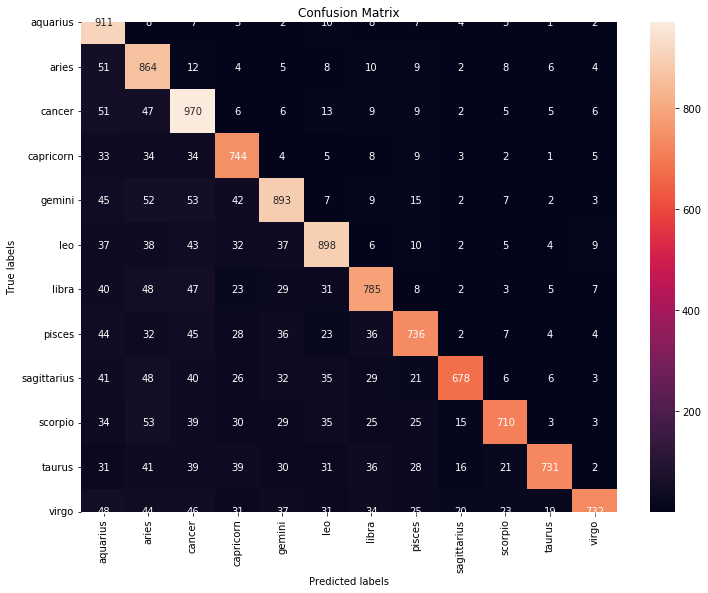

In [48]:
plt.figure(figsize=(12,9))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt="d");

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(cm_lab); 
ax.yaxis.set_ticklabels(cm_lab);

In [49]:
knn_test = knn.predict(x_test) 
print(classification_report(y_test, knn_test))

              precision    recall  f1-score   support

    aquarius       0.08      0.22      0.12       294
       aries       0.09      0.18      0.12       345
      cancer       0.09      0.15      0.11       328
   capricorn       0.06      0.06      0.06       315
      gemini       0.08      0.06      0.07       366
         leo       0.10      0.07      0.08       395
       libra       0.10      0.06      0.08       326
      pisces       0.07      0.05      0.06       337
 sagittarius       0.08      0.03      0.05       347
     scorpio       0.08      0.04      0.05       355
      taurus       0.07      0.04      0.05       345
       virgo       0.08      0.05      0.06       361

    accuracy                           0.08      4114
   macro avg       0.08      0.08      0.08      4114
weighted avg       0.08      0.08      0.07      4114



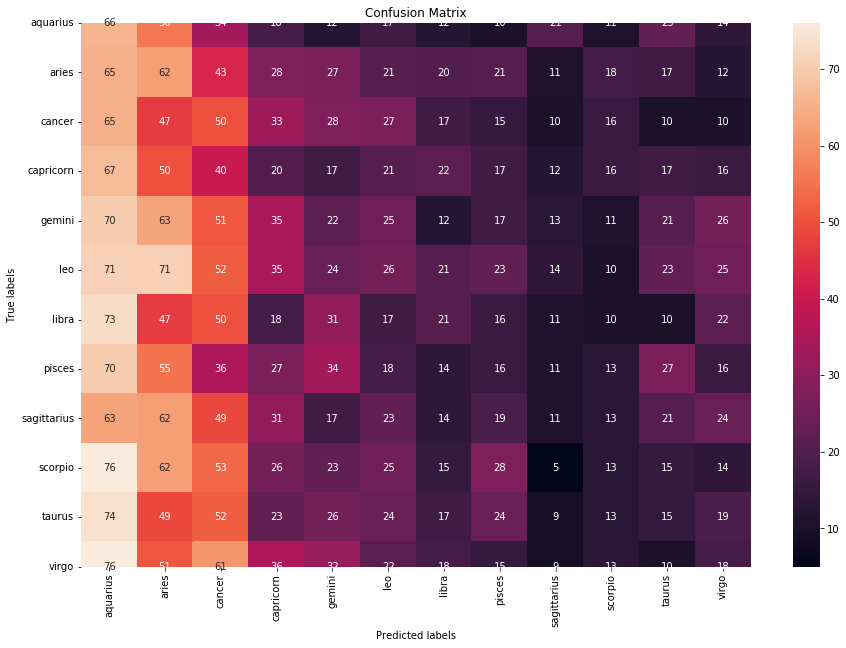

In [51]:
f_cm = confusion_matrix(y_test, knn_test)
knn_l = knn.classes_

plt.figure(figsize=(15,10))

ax= plt.subplot()
sns.heatmap(f_cm, annot=True, ax = ax, fmt="d");

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_l); 
ax.yaxis.set_ticklabels(knn_l);